In [15]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/ML/Random Forest/random_forest_loan_data.csv')  # Replace with your file path
df.head()

,Gender,Age,Income,Employment_Status,Credit_Score,Loan_Amount,Loan_Term_Months,Has_Defaulted_Before,Fraudulent_Activity,Loan_Status
0,Male,59,45426,Unemployed,527,47418,48,0,0,Under Review
1,Male,49,37772,Student,401,36163,60,1,0,Rejected
2,Female,35,123754,Unemployed,716,25604,24,1,0,Rejected
3,Male,63,23712,Unemployed,515,16310,60,1,0,Rejected
4,Male,28,21367,Self-employed,706,9226,12,1,0,Rejected


In [16]:
#clean

Rejected        1339
Under Review     441
Approved         220
Name: Loan_Status, dtype: int64
               Age         Income  Credit_Score   Loan_Amount  \
count  2000.000000    2000.000000   2000.000000   2000.000000   
mean     42.694000   83412.557500    577.277500  25303.847500   
std      12.614195   37463.149497    157.800669  14138.869656   
min      21.000000   20138.000000    300.000000   1048.000000   
25%      32.000000   50436.000000    442.000000  13105.250000   
50%      43.000000   83296.500000    576.000000  25135.000000   
75%      54.000000  115031.000000    716.250000  37798.500000   
max      64.000000  149992.000000    849.000000  49947.000000   

       Loan_Term_Months  Has_Defaulted_Before  Fraudulent_Activity  
count       2000.000000           2000.000000           2000.00000  
mean          35.142000              0.475000              0.03950  
std           16.955223              0.499499              0.19483  
min           12.000000              0.0000

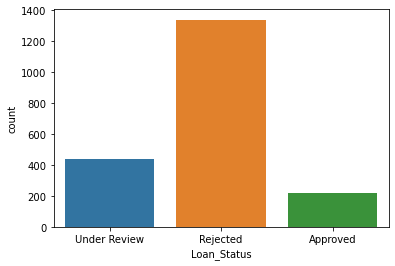

In [17]:
# Value counts for the target variable
print(df['Loan_Status'].value_counts())

# Basic summary statistics
print(df.describe())

# Distribution plots (optional if using matplotlib/seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Loan_Status')
plt.show()


In [31]:
#Feature Selection

In [32]:
df_encoded = pd.get_dummies(df.drop(columns=['Loan_Status']), drop_first=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan_Status_Code'] = le.fit_transform(df['Loan_Status'])


In [34]:
#Feature Selection

In [35]:
df_temp = df.copy()
df_temp_encoded = pd.get_dummies(df_temp.drop(columns=['Loan_Status']), drop_first=True)

cor = df_temp_encoded.corr()
cor_target = cor['Loan_Status_Code']
print(cor_target[abs(cor_target) > 0.1])


Income                 -0.220421
Credit_Score           -0.118878
Has_Defaulted_Before   -0.186302
Loan_Status_Code        1.000000
Name: Loan_Status_Code, dtype: float64


In [36]:
#Prepare Data for Model

In [37]:
X = df_encoded
y = df['Loan_Status_Code']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Evaluate the Model

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))


[[ 38   0   0]
 [  0 276   0]
 [  0   0  86]]
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00        38
    Rejected       1.00      1.00      1.00       276
Under Review       1.00      1.00      1.00        86

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.show()
